In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here we have choosen to use the "wine" dataset from sklearn

In [3]:
from sklearn.datasets import load_wine

In [4]:
X,y=load_wine(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split

Here the by default split is in terms of 75% train data and 25% test data

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [7]:
X_train   #note this is a 2D vector

array([[1.364e+01, 3.100e+00, 2.560e+00, ..., 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.260e+01, 2.460e+00, 2.200e+00, ..., 7.300e-01, 1.580e+00,
        6.950e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [8]:
y_train # and this is a 1D vector

array([0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       2])

In [9]:
y_train # and this is a 1D vector
from sklearn.tree import DecisionTreeClassifier


In [10]:
from sklearn.tree import DecisionTreeClassifier

This is a model without post prunning

In [11]:
model=DecisionTreeClassifier(random_state=0)   # this random state is for getting the same value even when rerun

What is fit of data? 
The model tries to find the best parameters that allow it to predict the target variable (y) from the input features (X).
This is done by adjusting the model's parameters (or coefficients) to minimize the error between the model's predictions and the actual outcomes in the training data.

In [12]:
model.fit(X_train,y_train)  # we only fit the train data and not the test data as we only want the model to understand train data and later apply knowledge to test data

DecisionTreeClassifier(random_state=0)

In [13]:
y_train_predicted=model.predict(X_train)

In [14]:
y_test_predicted=model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_predicted)

1.0

In [16]:
accuracy_score(y_test,y_test_predicted)

0.9333333333333333

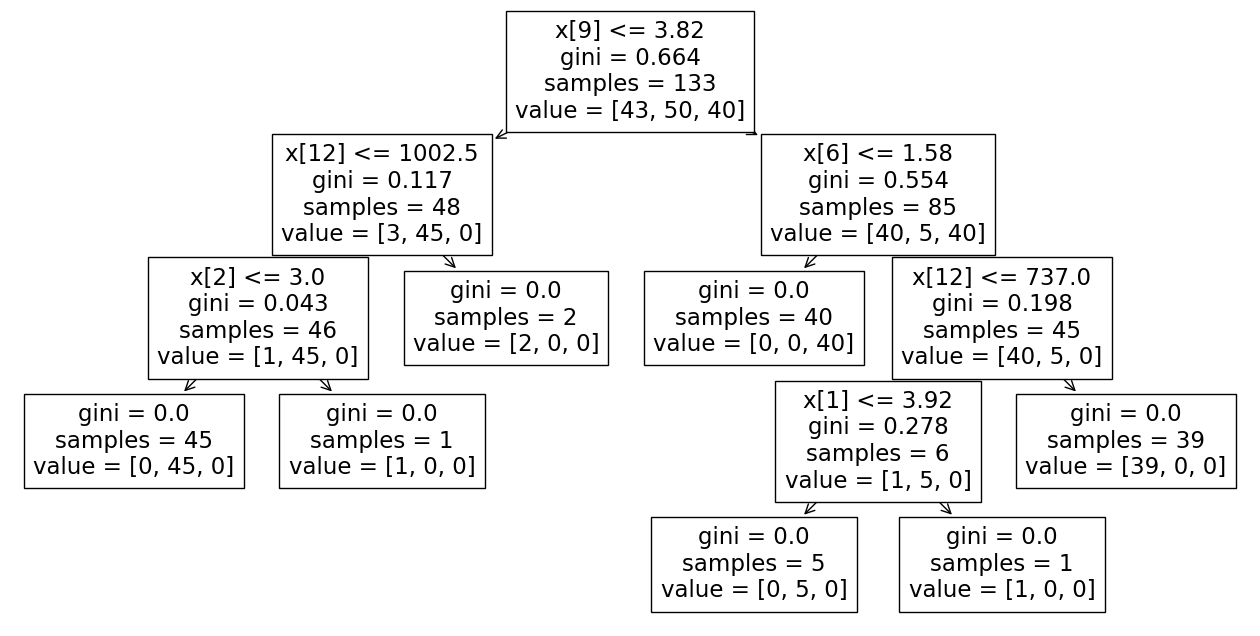

In [17]:
from sklearn import tree
plt.figure(figsize=(16,8))
tree.plot_tree(model)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test_predicted,y_test))

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predicted)

array([[14,  2,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

Now let us post prune

In [22]:
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [23]:
y_train_predicted=treemodel.predict(X_train)
y_test_predicted=treemodel.predict(X_test)

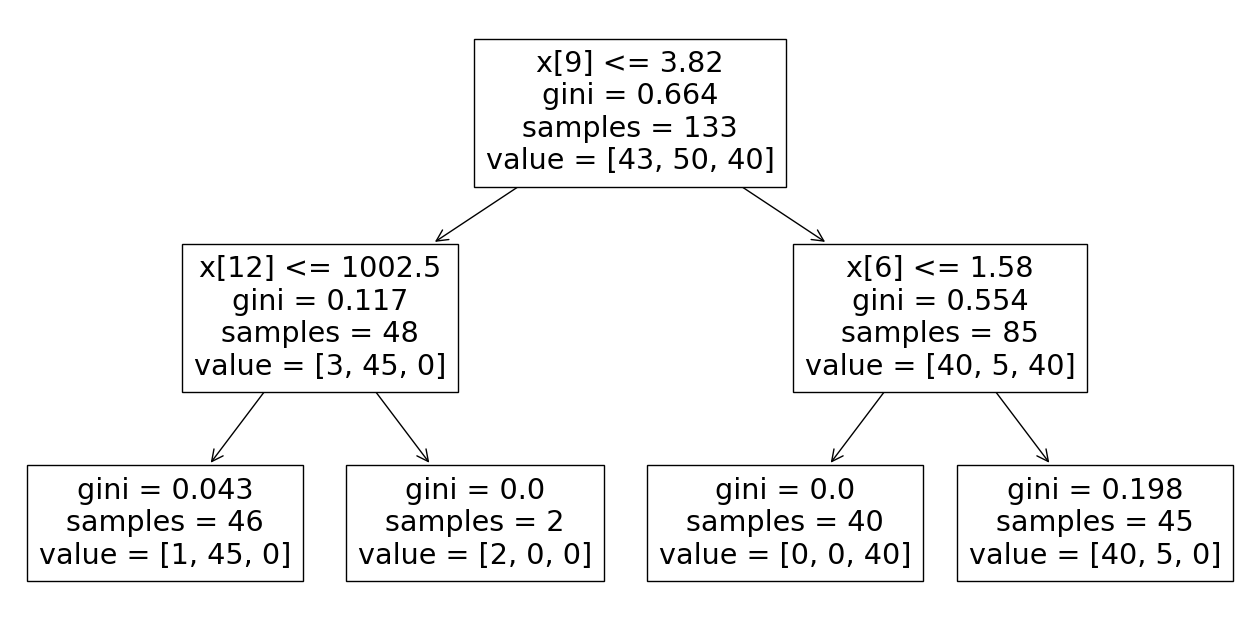

In [24]:
from sklearn import tree
plt.figure(figsize=(16,8))
tree.plot_tree(treemodel)
plt.show()

In [25]:
y_test_predicted

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
score=accuracy_score(y_train,y_train_predicted)
print(score)

0.9548872180451128


In [28]:
score=accuracy_score(y_test,y_test_predicted)
print(score)

0.8444444444444444


In [29]:
print(classification_report(y_test_predicted,y_test))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.71      0.94      0.81        16
           2       1.00      0.89      0.94         9

    accuracy                           0.84        45
   macro avg       0.88      0.86      0.86        45
weighted avg       0.87      0.84      0.85        45



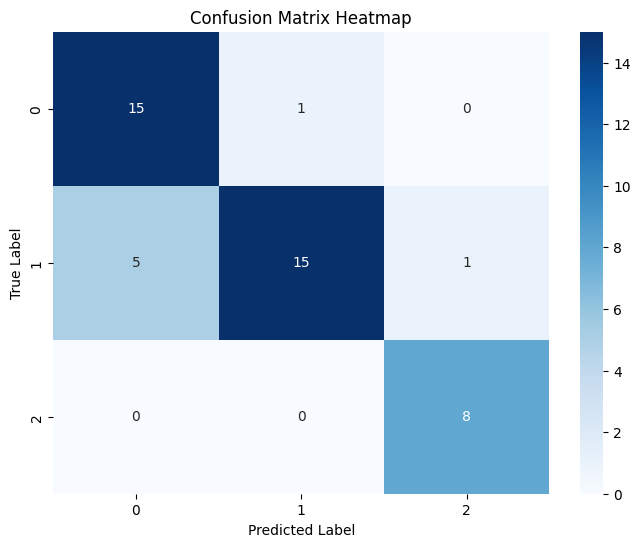

In [31]:
cm = confusion_matrix(y_test, y_test_predicted)

# Step 3: Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()